# Bayesian inverse problems

In many problems statistical image analysis problems, we are interested in recovering an image of interest, $x \in \mathbb{R}^d$, from a set of measurements $y \in \mathbb{R}^n$. These two are related by a statistical model with likelihood function

$$p(y|x) = e^{-f_{y}(x)}\,\,,$$

where $f_{y}$ is convex and continuously differentiable with $L_{y}$-Lipschitz gradient. This class includes important observation models, in particular Gaussian linear models of the form

$$y = Ax + w\,\,,$$ 

where $A \in \mathbb{R}^{n \times d}$ is a linear operator and $w \sim N(0, \sigma^2 I_d)$ is a noise term.  Here, we study the case where both $A$ and $\sigma^2 \in \mathbb{R}$ are known. 

However, the recovery of $x$ from $y$ is often ill posed or ill conditioned, so regularisation is required in order to deliver meaningful solutions. In the Bayesian framework, this is achieved by using prior knowledge about $x$. We consider prior distributions given for any $x\in\mathbb{R}^{d}$ and $\theta\in \Theta\subset (0,+\infty)$ by

$$p(x|\theta) = e^{-\theta g(x)}/Z(\theta)\,\,,$$

for some function $g: \mathbb{R}^{d} → \mathbb{R}$ that is convex but potentially not smooth. The normalising constant of the prior distribution $p(x|\theta)$ is given by

$$Z(\theta)=\int_{\mathbb{R}^{d}}e^{-\theta g(\tilde{x})}d\tilde{x}\,\,.$$

The parameter $\theta$ controls the amount of regularity enforced. This parameter is difficult to set a priori and impacts critically the quality of the inferences. ***The purpose of this assignement is to implement a stochastic approximation proximal gradient algorithm to estimate $\theta$ directly from $y$ by maximum marginal likelihood estimation.***


# Empirical Bayes estimation

Adopting a so-called empirical Bayesian approach, the regularisation parameter $\theta$ is estimated directly from the observed data $y$ by maximum marginal likelihood estimation, i.e.,

$$\theta^{*} = argmax_{\theta\in\Theta}\,\,p(y|\theta)\,\,,$$

where the marginal likelihood $p(y|\theta)$ is given for any $\theta\in\Theta$ by 

$$p(y|\theta) = \int_{\mathbb{R}^{d}}p(y|\tilde{x})p(\tilde{x}|\theta)d\tilde{x}\,\,.$$

The value $\theta^{*}$ can then be used to specify a (pseudo-) posterior distribution $p(x|y,\theta^{*})$, for example to derive point estimators of $x$.

This is achieved by using a stochastic approximation proximal gradient algorithm that mimics a projected gradient ascent algorithm to compute $\theta^{*}$. Suppose that $p(y|\theta)$ were tractable and that we had access to the gradient mapping $\nabla_{\theta} \log p(y|\theta)$. Recalling that $\Theta$ is a convex compact set, we could use the projected gradient algorithm

$$\theta_{n+1} = \Pi_{\Theta}[\theta_{n} - \delta_{n}\nabla_{\theta}\log p(y|\theta_{n})]$$

**Since $\nabla_{\theta} \log p(y|\theta)$ is not tractable**, we cannot directly use the above algorithm and we choose a stochastic variant of the projected gradient algorithm, known as **Stochastic Approximation Proximal Gradient (SAPG) algorithm**. In particular, we express the gradient $\nabla_{\theta}\log p(y|\theta)$ as

$$\nabla_{\theta}\log p(y|\theta) = -\int_{\mathbb{R}^{d}}g(\tilde{x})p(\tilde{x}|y,\theta)d\tilde{x} - \nabla_{\theta}\log (Z(\theta))\,\,,$$

and derive the Monte Carlo approximation

$$\nabla_{\theta}\log p(y|\theta) \approx - \dfrac{1}{m}\sum_{i=1}^{m}g(X_{i}) - \nabla_{\theta}\log (Z(\theta)) = \Delta_{m,\theta}\,\,,$$

where $(X_{k})_{k=1}^{m}$ is a sample of size $m\in\mathbb{N}^{*}$ generated by using a Markov Chain targeting $p(x|y,\theta)$, or a regularised approximation of this density.

The last term that remains is the $\nabla_{\theta}\log (Z(\theta))$. Assume that there exists $\alpha > 0$ such that $g$ is $\alpha$ positively homogeneous function, i.e. for any $x\in\mathbb{R}^{d}$ and $t>0$, $g(tx) = t^{\alpha}g(x)$, and recalling that $ \Theta \in (0,+\infty)$ we have for any $\theta\in\Theta$

$$Z(\theta) = \int_{\mathbb{R}^{d}}e^{-\theta g(\tilde{x})}d\tilde{x} = \int_{\mathbb{R}^{d}}e^{- g(\theta^{1/\alpha}\tilde{x})}d\tilde{x} =
\theta^{-d/\alpha}\int_{\mathbb{R}^{d}}e^{g(\tilde{x})}d\tilde{x}\,\,,$$

and so,

$$\dfrac{d}{d\theta}\log Z(\theta) = -\dfrac{d}{\alpha\theta}.$$

Now, we can calculate $\Delta_{m,\theta}= - \dfrac{1}{m}\sum_{i=1}^{m}g(X_{i}) + \dfrac{d}{\alpha\theta}\,\,.$. In this assignment, the samples $(X_{k})_{k=1}^{m}$ will be generated by using the Moreau-Yoshida regularised ULA (MYULA), specialised for models with terms that are convex but not smooth. You can find more details about this algorithm by reading Durmus et a. (2018) https://epubs.siam.org/doi/10.1137/16M1108340. The SAPG algorithm used this is exercise is a specific instance of SOUL (see Vidal et al. (2020) https://epubs.siam.org/doi/abs/10.1137/20M1339829, Algorithm 1).

## Getting Started

To begin, we clone the github repository where the pretrained network is stored, and load the required packages.

In [ ]:
%cd /content
!git clone https://github.com/MathematicalImagingEdinburgh/ColabTutorials.git

/content
Cloning into 'ColabTutorials'...
remote: Enumerating objects: 100, done.
remote: Counting objects: 100% (100/100), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 100 (delta 21), reused 62 (delta 8), pack-reused 0
Receiving objects: 100% (100/100), 36.07 MiB | 17.73 MiB/s, done.
Resolving deltas: 100% (21/21), done.


In [ ]:
%cd /content/ColabTutorials/SAPG

/content/ColabTutorials/SAPG


In [ ]:
# Load necessary packages

import numpy as np
from scipy.linalg import norm
import os

import matplotlib
matplotlib.rc('font', size=20)
matplotlib.rc('font', family='serif')
matplotlib.rc('figure', figsize=(14, 8))
matplotlib.rc('lines', linewidth=2.5,linestyle="-.")
matplotlib.rc('lines', markersize=10)
matplotlib.rc('figure.subplot', hspace=.4)
import matplotlib.pyplot as plt

from functions.max_eigenval import max_eigenval
from functions.cshift import cshift
from functions.norml12 import tv
from functions.Grad_Image import Grad_Image
from functions.chambolle_prox_TV import chambolle_prox_TV

from tqdm.auto import tqdm

## Create a path and a folder to save your results

In [ ]:
# Save your results in a folder for easy access

path = './results_PnP_normalization'

# Check whether the specified path exists or not
isExist = os.path.exists(path)

if not isExist:
  
  # Create a new directory because it does not exist 
  os.makedirs(path)
  print("The new directory is created!")

The new directory is created!


## Import the ground truth image 

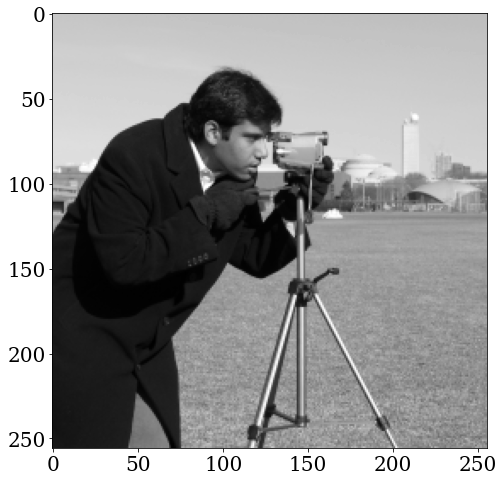

In [ ]:
#Import and show the image

x = np.loadtxt('images/cameraman.txt', dtype=float) # Cameraman image to be used for the experiment

# Image dimension
nx,ny=[x.shape[0],x.shape[1]]
dimX= nx*ny

fig, ax = plt.subplots()
ax.imshow(x,cmap='gray')

## Define a forward/measurement model to generate data.

In this case, $A$ will be a linear operator applying a [box blur](https://en.wikipedia.org/wiki/Box_blur) of size 9 by 9, and we set $\sigma=(1/255)^{2}$.

In [ ]:
# Forming a 9x9 uniform blurring operator

h = np.ones(9)
lh = len(h)
h = h/np.sum(h)
h = np.concatenate((h,np.zeros(nx-lh)))
h = cshift(h, -(lh-1)/2)
h = h.reshape(-1, 1) @ h.reshape(1, -1)

By using that $A$ is a circulant matrix constructed from $h$, we implement the product $Ax$ as an operator $A(x) = \mathcal{F}^{-1}\left(\mathcal{F}(A)\cdot\mathcal{F}(x)\right)$, where $\mathcal{F}$ denotes the discrete Fourier transform.

In [ ]:
# H and H' operators in the fourier domain
H_FFT = np.fft.fft2(h)
HC_FFT = np.conj(H_FFT)

del h

# K operator
K = lambda x: np.real(np.fft.ifft2(np.multiply(H_FFT,np.fft.fft2(x))))
# K transpose operator
KT = lambda x: np.real(np.fft.ifft2(np.multiply(HC_FFT,np.fft.fft2(x))))
# KtK operator
KTK = lambda x: np.real(np.fft.ifft2(np.multiply(np.multiply(HC_FFT,H_FFT),np.fft.fft2((x)))))

## Generate the observed data $y$

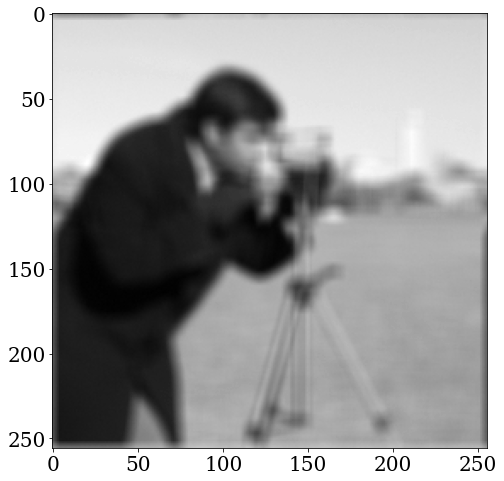

In [ ]:
# generate the blurred and noisy observation 'y'
y = K(x)
BSNR = 40 # we will use this noise level
sigma = norm(y-np.mean(y),'fro')/np.sqrt(nx*ny*10**(BSNR/10))
sigma2 = sigma**2
y = y + sigma*np.random.randn(nx,ny)

fig, ax = plt.subplots()
ax.imshow(y,cmap='gray')

## Define the likelihood

In [ ]:
f = lambda z: (norm(np.ravel(y-K(z)),2)**2)/(2*sigma2)   # Negative log-likelihood

In [ ]:
KTy = KT(y)
gradf = lambda x: (KTK(x) - KTy)/sigma2        # gradient of the negative log-likelihood

## Define a prior

In this assignment, we will consider a prior based on the total variation (TV) norm

$$p(x) \propto e^{- \theta ||x|| _{TV}}\,\,,$$

and so $g(x)=||x|| _{TV}$ where $||x|| _{TV}=\sum_{i,j}^{}\sqrt{|x_{i+1,j}-x_{i,j}|^2+|x_{i,j+1}-x_{i,j}|^2}$. The motivation for using the TV norm is that it promotes solutions with sharp edges and homogeneous regions. The function **g_fun()** calculates the $||\cdot|| _{TV}$. The function **g_fun_theta()** provided below calculates the $\theta||\cdot|| _{TV}$.

In [ ]:
# Only the TV norm function for monitoring

g_fun = lambda z: tv(Grad_Image(z))                     # Regularization term without theta
g_fun_theta = lambda z,theta: theta*tv(Grad_Image(z))   # Regularization term with theta

We should note that $g(x)=||\cdot||_{TV}$ is not a smooth function. Instead, we will consider a Moreau-Yosida (MY) approximation ${g}^{\lambda}$ of $g$, which we involve via its proximal operator.

The function **proxg()** below calculates the proximity operator 

$$prox_{g}^{\lambda}(x)=argmin_{u\in\mathbb{R}^{M}}\{g(u)+(2\lambda)^{-1}||u-x||^{2}\}\,\,.$$
for the total-variation norm.

Moreover, the function **gradg()** calculates the gradient $$\nabla g^{\lambda}(x)=\lambda^{-1}(x-prox_{g}^{\lambda}(x))$$


In [ ]:
proxg = lambda x,lam: chambolle_prox_TV(x,lam,25)                  # proximity operator
gradg = lambda x,lam,lambda_prox: (x -proxg(x,lam))/lambda_prox    # gradient of the prior

## Define the log-posterior

In [ ]:
logPi = lambda z,theta:  (- f(z) - g_fun_theta(z,theta))    # Log of posterior distribution

## Setting the algorithm parameters

For this assignment, the MYULA kernel driving the SAPG algorithm will be implemented with the following parameters, which need to be chosen carefully to guarantee the convergence of the iterates:

In [ ]:
# Lipschitz Constants

AAt_norm = max_eigenval(K, KT, nx,1e-4, int(1e4), 0) # Maximum eigenvalue of operator A. Norm of blurring operator.

L_f = AAt_norm/sigma2 # Lipshcitz constant of f.

lambda_prox = 1/L_f   # regularization parameter of proximity operator.

L_g = 1/lambda_prox    # Lipshcitz constant of g.

L = L_f+L_g            # Global Lipshcitz constant, required to set the step size of MYULA.

# Stepsize of MCMC algorithm.

gamma = 0.98*(1/L)

Regarding the projected gradient algorithm parameters, we consider  $\delta_{n} = c_{0} n^{-0.8}$ as a stepsize for the optimization algorithm where $c_{0} = (10\cdot\theta_{0} d)^{-1}$.

In [ ]:
# Initialization of parameter theta
th_init = 0.01

# Define a convex set Θ.

min_th = 0.001
max_th = 1

# Choose stepsize delta 

d_scale = (0.1/th_init)
d_exp = 0.8

# delta(i) steps for SAPG algorithm 

delta = lambda i: d_scale*( (i**(-d_exp)) / dimX )

## Stochastic Approximation Proximal Gradient (SAPG) algorithm



Initializations for the MCMC and optimization algorithms

In [ ]:
# Initialization of the warm-up chain
X_wu = np.copy(y) 

# Warmup period for the MCMC chain, before starting the SAPG updates of \theta
warmupSteps = 300

# burn-in period for the optimization algorithm on theta (iterates that will not be considered for the estimation)
burnIn = 20

# Maximum total number of iterations for the optimization algorithm on theta
total_iter = 1500

**Task 2.1:** For a fixed value $\theta_{0}$ and `X_wu`, run the MYULA MCMC sampler for `warmupSteps` iteration to warm up the Markov chain before starting the SAPG algorithm. 

### Some important practical comments regarding the algorithm

For stability reasons, we will work on a logarithmic scale. So we define an auxiliary variable $\eta$ such that $\theta_{n} = e^{\eta_{n}} \iff	\eta_{n} = \log\theta_{n}$.

The intuition behind the SAPG algorithm is that for each update of $\theta$, we need to "update"
the MCMC sampler for the new value. Therefore, to compute
$\theta^{*}$, we can build a sequence $(\theta_{n})_{n\in\mathbb{N}}$ associated with the following recursion for any $n\in\mathbb{N}$

$$\theta_{n+1} = \Pi_{\Theta}[\theta_{n} - \delta_{n}\Delta_{m_{n},\theta_{n}}]\,\,,$$

where $\Delta_{m_{n},\theta_{n}} = - \dfrac{1}{m_{n}}\sum_{i=1}^{m_{n}}g(X_{i}) - \nabla_{\theta}\log (Z(\theta_{n}))$

starting from some $\theta_{0}\in\Theta$, and where $(m_{n})_{n\in\mathbb{N}}$ is a sequence of non-decreasing sample sizes.

For the considered problem, we recommend taking $m = 1$, i.e., after each update of $\theta_{n}$ we run only 1 iteration of the MCMC sampler with the new iterate $\theta_{n+1}$. This is enough to drive the SAPG algorithm.

The SAPG algorithm is stochastic and the same holds now for the sequence $(\theta_{n})_{n\in\mathbb{N}}$. To get an approximate estimate of $\theta^{*}$, a weighted average will be considered as

$$\bar{\theta}_{N} = \dfrac{\sum_{n=0}^{N-1}\omega_{n}\theta_{n}}{\sum_{n=0}^{N-1}\omega_{n}}\,\,,$$

where $N$ is the total number of iterations of the SAPG algorithm and $(\omega_n)_{n\in\mathbb{N}}$ are weights given by

$$\omega_{n} = \begin{cases}
    0,& \text{if}\,\,\,\, n< N_{0}\\
    1,& \text{if}\,\,\,\, N_{0}<n<N
\end{cases}
$$

where $N_{0}$ is the number of the algorithm's iterations used as a burn-in phase and are to be discarded.

To determine the number of iterations $N$ of the SAPG algorithm (not to be confused with the number of MCMC iterations $m_{n}$), we stop the algorithm when

$$\left|\dfrac{\bar{\theta}_{N+1}-\bar{\theta}_{N}}{\bar{\theta}_{N}}\right|<\tau\,\,\,,$$

for a prescribed tolerance $\tau > 0$ (e.g., $\tau = 10^{-3}$).

**Task 2.2:** Implement the SAPG algorithm to estimate $\theta$ described above to compute an estimate $\bar{\theta}_{N}$ for the problem considered. 

In [ ]:
#Add code for the SAPG algorithm here and compute results

# Results

**Task 2.3:** Display the evolution of the iterates $\theta_1,\theta_2,\ldots$ and report the estimate $\bar{\theta}_{N}$. Briefly discuss your results.